In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

zip_path = '/content/drive/MyDrive/car detection.zip'
extract_path = '/content/drive/My Drive/car'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [3]:
# Download yolov3.weights
!wget -P /content/dataset/ https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/dataset/yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O /content/dataset/coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names





--2024-11-28 02:31:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/dataset/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  7.84MB/s    in 25s     

2024-11-28 02:31:37 (9.49 MB/s) - ‘/content/dataset/yolov3.weights’ saved [248007048/248007048]

--2024-11-28 02:31:38--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘/content/dataset/yolov3.cfg’

/content/dataset/yo 100%[======

In [4]:

import os

weights_path = '/content/dataset/yolov3.weights'
cfg_path = '/content/dataset/yolov3.cfg'
names_path = '/content/dataset/coco.names'



Checking file existence...
Found: /content/dataset/yolov3.weights
Found: /content/dataset/yolov3.cfg
Found: /content/dataset/coco.names
YOLO model loaded successfully.
Class labels loaded successfully.
Output layers retrieved successfully: ['yolo_82', 'yolo_94', 'yolo_106']
Training images files: ['vid_4_10000.jpg', 'vid_4_10020.jpg', 'vid_4_10040.jpg', 'vid_4_10060.jpg', 'vid_4_10080.jpg', 'vid_4_10100.jpg', 'vid_4_10120.jpg', 'vid_4_10140.jpg', 'vid_4_10160.jpg', 'vid_4_10180.jpg', 'vid_4_1020.jpg', 'vid_4_10200.jpg', 'vid_4_10220.jpg', 'vid_4_10240.jpg', 'vid_4_10260.jpg', 'vid_4_10280.jpg', 'vid_4_10300.jpg', 'vid_4_10320.jpg', 'vid_4_10340.jpg', 'vid_4_10360.jpg', 'vid_4_10380.jpg', 'vid_4_1040.jpg', 'vid_4_10400.jpg', 'vid_4_10420.jpg', 'vid_4_10440.jpg', 'vid_4_10460.jpg', 'vid_4_10480.jpg', 'vid_4_10500.jpg', 'vid_4_10520.jpg', 'vid_4_10540.jpg', 'vid_4_10560.jpg', 'vid_4_10580.jpg', 'vid_4_1060.jpg', 'vid_4_10600.jpg', 'vid_4_10620.jpg', 'vid_4_10640.jpg', 'vid_4_10660.jpg', '

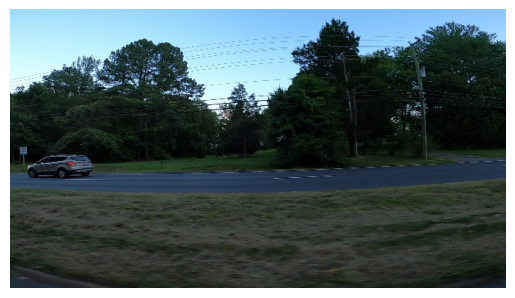

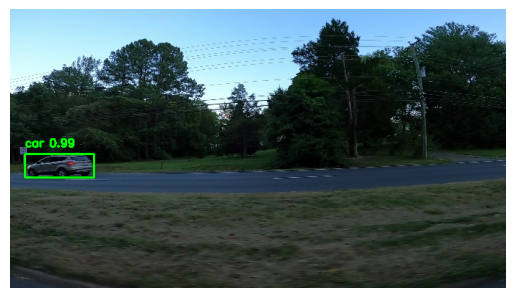

In [7]:

# Check if the files exist
print("Checking file existence...")

if os.path.exists(weights_path):
    print(f"Found: {weights_path}")
else:
    print(f"Error: {weights_path} does not exist")

if os.path.exists(cfg_path):
    print(f"Found: {cfg_path}")
else:
    print(f"Error: {cfg_path} does not exist")

if os.path.exists(names_path):
    print(f"Found: {names_path}")
else:
    print(f"Error: {names_path} does not exist")
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO
net = cv2.dnn.readNet(weights_path, cfg_path)

# Load COCO class labels
with open(names_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Get the output layer names
layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()

# Handle indexing for different OpenCV versions
output_layers = [layer_names[i - 1] for i in output_layers_indices]

print("YOLO model loaded successfully.")
print("Class labels loaded successfully.")
print("Output layers retrieved successfully:", output_layers)

# List files in the training_images directory
training_images_path = '/content/drive/MyDrive/car/data/training_images'
testing_images_path = '/content/drive/MyDrive/car/data/testing_images'

# Check contents of training_images
training_images_files = os.listdir(training_images_path)
print("Training images files:", training_images_files)

# Check contents of testing_images
testing_images_files = os.listdir(testing_images_path)
print("Testing images files:", testing_images_files)

# Example image file name (update with your actual file name)
image_file = training_images_files[0]  # Use the first image in training_images for example

# Construct the full path to the image
image_path = os.path.join(training_images_path, image_file)  # Update path if using testing_images

# Check if the image file exists
if os.path.exists(image_path):
    print(f"Image file found: {image_path}")
else:
    print(f"Error: Image file not found: {image_path}")

# Load and display the image
def load_and_display_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

load_and_display_image(image_path)

# Perform object detection
def detect_objects(image_path):
    img = cv2.imread(image_path)
    height, width, channels = img.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize lists to hold detection results
    class_ids = []
    confidences = []
    boxes = []

    # Process each output
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Filter out weak detections
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels on the image
    for i in range(len(boxes)):
        if i in indices:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)  # Green bounding box
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert BGR image to RGB for displaying
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

detect_objects(image_path)

Processing image: vid_5_26760.jpg


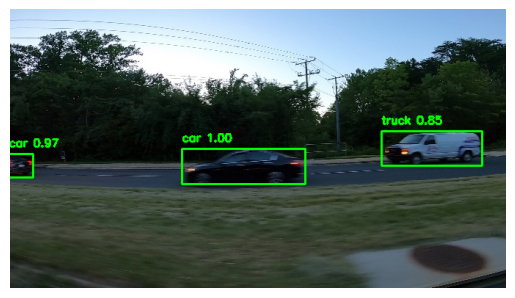

Processing image: vid_5_27420.jpg


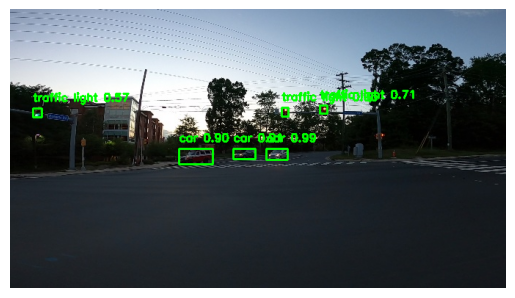

Processing image: vid_5_27480.jpg


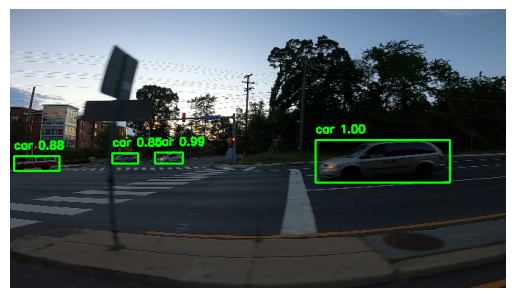

Processing image: vid_4_1800.jpg


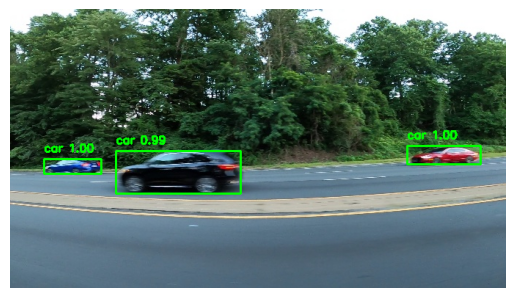

Processing image: vid_4_2020.jpg


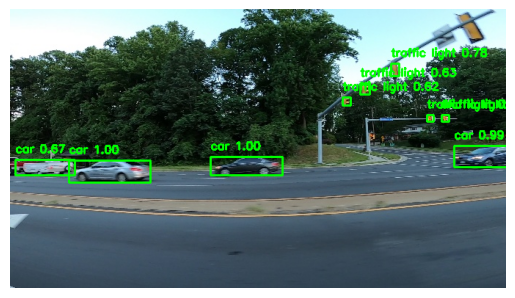

In [8]:
# Specific images to detect objects
image_files = [
    'vid_5_26760.jpg',
    'vid_5_27420.jpg',
    'vid_5_27480.jpg',
    'vid_4_1800.jpg',
    'vid_4_2020.jpg'
]

# Paths to the image directories
training_images_path = '/content/drive/MyDrive/car/data/training_images'
testing_images_path = '/content/drive/MyDrive/car/data/testing_images'

# Function to load an image
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    return img

# Function to perform object detection and display the result
def detect_and_display_objects(image_path):
    img = load_image(image_path)
    if img is None:
        return

    height, width, channels = img.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize lists to hold detection results
    class_ids = []
    confidences = []
    boxes = []

    # Process each output
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Filter out weak detections
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels on the image
    for i in range(len(boxes)):
        if i in indices:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)  # Green bounding box
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert BGR image to RGB for displaying
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

# Iterate over the specific images and perform detection
for image_file in image_files:
    # Check if the image file is in training or testing directory
    if os.path.exists(os.path.join(training_images_path, image_file)):
        image_path = os.path.join(training_images_path, image_file)
    elif os.path.exists(os.path.join(testing_images_path, image_file)):
        image_path = os.path.join(testing_images_path, image_file)
    else:
        print(f"Error: Image file not found: {image_file}")
        continue

    print(f"Processing image: {image_file}")
    detect_and_display_objects(image_path)